In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import requests
from urllib.request import Request, urlopen
pd.options.display.max_rows = 1500
pd.options.display.max_columns = 1500
%matplotlib inline

In [18]:
covid19 = pd.read_csv('../data/covid19.csv', sep = ",")
impact_factor = pd.read_csv('../data/JournalHomeGrid.csv', header = 1)
impact_factor.columns = ['Rank', 'journal_title', 'total_cites', 'impact_factor',
       'eigenfactor_score']

In [19]:
impact_factor['journal_title'] = impact_factor.journal_title.str.lower()
impact_factor[impact_factor.journal_title.str.contains('sensors', na= False)]
covid19.journal_title = covid19.journal_title.str.lower()
covid19['journal_title'] = covid19['journal_title'].str.replace('(\s\:.*$)',"")
covid19.journal_title = covid19.journal_title.str.replace("(\(.*\))", '').str.strip()

In [6]:
covid19['Published_year'] = pd.to_numeric(covid19['Published_year'])
covid19.publication_type = covid19.publication_type.str.replace('Journal Article,', "", regex = True)
covid19.publication_type = covid19.publication_type.str.replace(',Journal Article', "", regex = True)

In [9]:
# merge dataframes
covid19 = covid19.merge(impact_factor, left_on = 'journal_title', right_on = 'journal_title', how = 'left')

In [10]:
covid19.isnull().sum()

PMID                      0
Title                     0
ISOAbbreviation           0
journal_title             0
Abstract                663
Journalinfo_country       0
Published_year            0
Keyword_list           1886
publication_type          0
medline_citation          0
pubmed_year               0
Affiliation             154
Rank_x                  981
total_cites_x           981
impact_factor_x         981
eigenfactor_score_x     981
Rank_y                  981
total_cites_y           981
impact_factor_y         981
eigenfactor_score_y     981
dtype: int64

## Analysis manuscript without review articles

In [11]:
minus_reviews =covid19[~covid19.publication_type.str.contains("Review|Comment|Editorial|Letter|Published Erratum")==True]
minus_reviews.publication_type.value_counts()

Journal Article                                               1877
English Abstract                                               152
Case Reports                                                    58
Comparative Study                                               45
Evaluation Study                                                34
News                                                            17
Comparative Study,Evaluation Study                              11
Observational Study                                              5
Validation Study                                                 5
Congress                                                         4
Multicenter Study                                                3
Historical Article                                               3
Comparative Study,English Abstract                               2
Randomized Controlled Trial                                      2
Video-Audio Media                                             

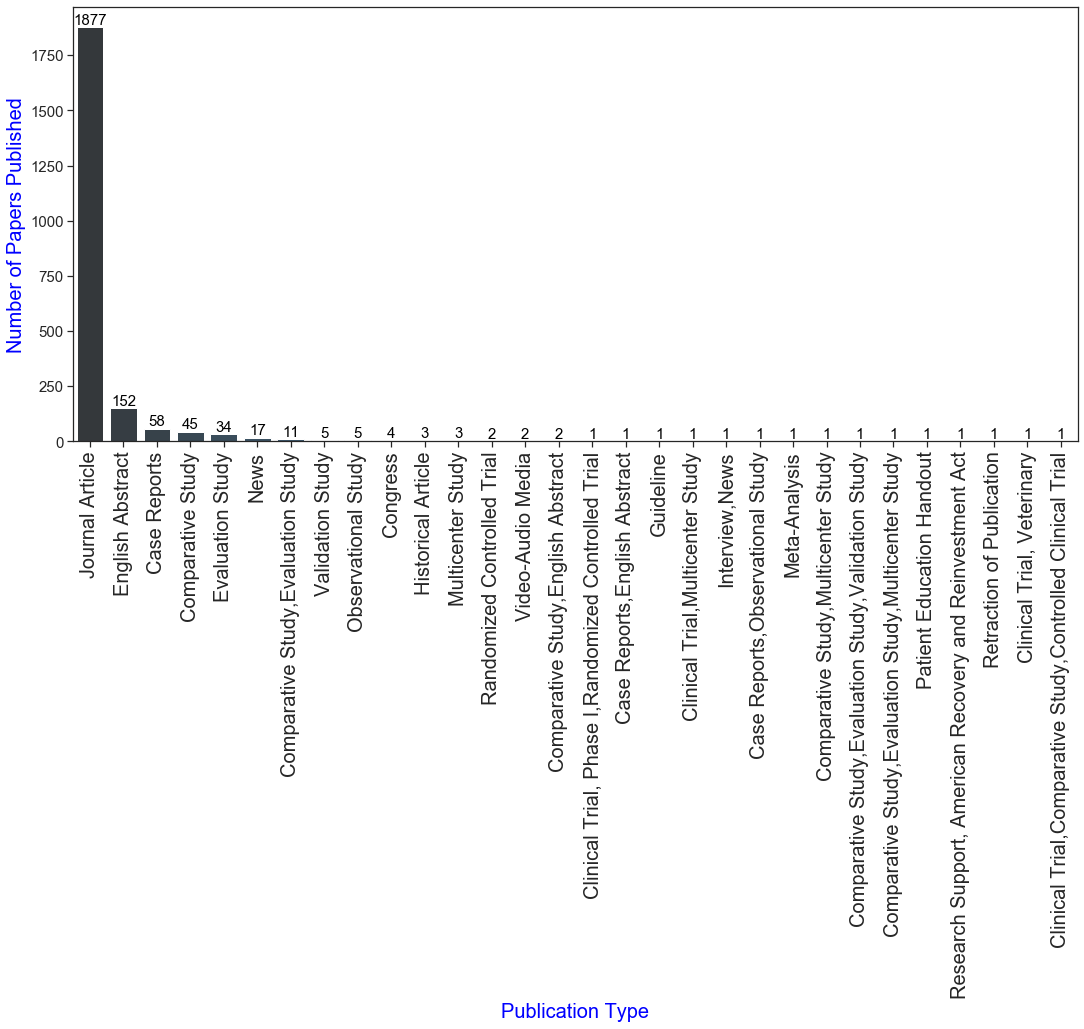

In [12]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")
publication_type = minus_reviews.groupby('publication_type')['PMID'].count().reset_index()\
                        .sort_values('PMID', ascending =False).reset_index(drop= True).head(30)
ax =sns.barplot(x = 'publication_type', y = 'PMID', data = publication_type, palette ="Blues_d")
plt.xlabel('Publication Type',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
for index, row in publication_type.iterrows():
    ax.text(row.name,row.PMID, round(row.PMID),color='black', ha="center",fontsize = 15, va='bottom')#, clip_on= True);


In [13]:
num_published_year= minus_reviews.groupby('Published_year')['PMID'].count().reset_index()\
                        .sort_values('Published_year', ascending =False)\

num_published_year

,Published_year,PMID
35,2020,853
34,2019,119
33,2018,105
32,2017,96
31,2016,85
30,2015,86
29,2014,92
28,2013,97
27,2012,65
26,2011,46


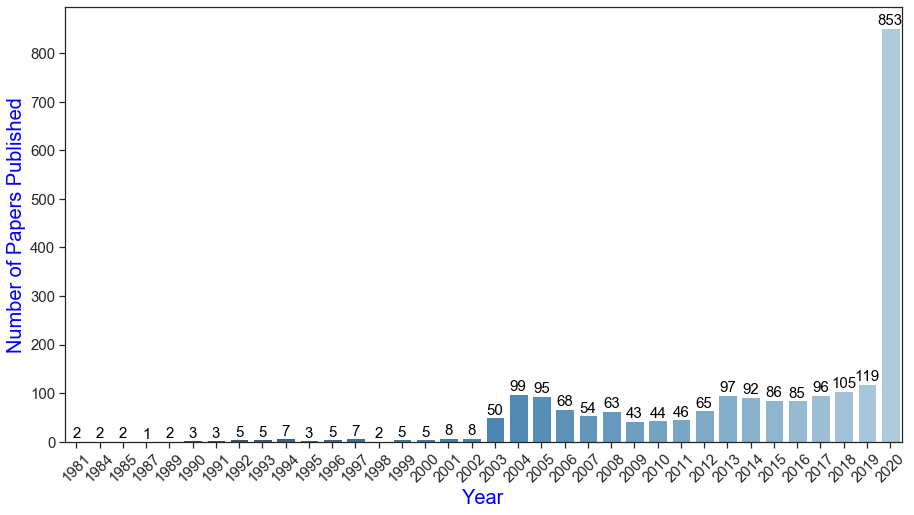

In [14]:
sns.set(rc={'figure.figsize':(15,8)}, style ='white' )
sns.set_style("ticks")
num_published_year= minus_reviews.groupby('Published_year')['PMID'].count().reset_index()\
                        .sort_values('Published_year', ascending =False)
g =sns.barplot(x = 'Published_year', y = 'PMID', data = num_published_year, palette ="Blues_d")
plt.xlabel('Year',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
for index, row in num_published_year.iterrows():
    g.text(row.name,row.PMID, round(row.PMID), color='black', ha="center", fontsize = 15, va='bottom');

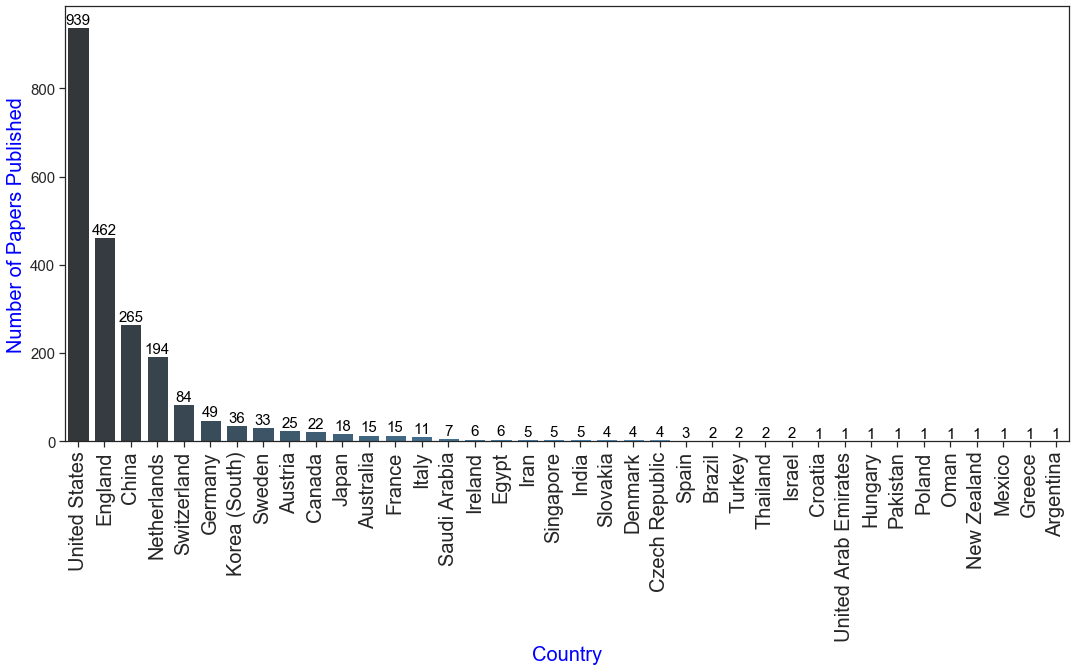

In [15]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")
num_published_country= minus_reviews.groupby('Journalinfo_country')['PMID'].count().reset_index()\
                        .sort_values('PMID', ascending =False).reset_index(drop= True)\

g =sns.barplot(x = 'Journalinfo_country', y = 'PMID', data = num_published_country, palette ="Blues_d")
plt.xlabel('Country',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
for index, row in num_published_country.iterrows():
    g.text(row.name,row.PMID, round(row.PMID), color='black', ha="center", fontsize = 15, va='bottom');

In [21]:
minus_reviews.head()

,PMID,Title,ISOAbbreviation,journal_title,Abstract,Journalinfo_country,Published_year,Keyword_list,publication_type,medline_citation,pubmed_year,Affiliation,Rank_x,total_cites_x,impact_factor_x,eigenfactor_score_x,Rank_y,total_cites_y,impact_factor_y,eigenfactor_score_y
1,32182347,Perinatal Transmission of COVID-19 Associated ...,Clin. Infect. Dis.,clinical infectious diseases,We presented two cases of COVID-19 associated ...,United States,2020,"COVID-19,SARS-CoV-2,pregnancy outcome,vertical...",Journal Article,Publisher,2020,"Department of Obstetrics, Renmin Hospital of W...",321,"64,031",9.055,0.11894,321,"64,031",9.055,0.11894
3,32181990,Successful recovery of COVID-19 pneumonia in a...,Am. J. Transplant.,american journal of transplantation,The current outbreak of Coronavirus Disease 20...,United States,2020,"COVID-19,Coronavirus,Pneumonia,immunosuppressi...",Case Reports,Publisher,2020,"Institute of Organ Transplantation, Tongji Hos...",491,"24,285",7.163,0.05096,491,"24,285",7.163,0.05096
5,32181911,Diagnostic Utility of Clinical Laboratory Data...,J. Med. Virol.,journal of medical virology,The role of clinical laboratory data in the di...,United States,2020,"D-Dimer,IL-6,The severe COVID-19,diagnostic ut...",Journal Article,Publisher,2020,"Department of Clinical Laboratory, Fuyang Seco...",5207,"8,197",2.049,0.01058,5207,"8,197",2.049,0.01058
6,32181904,"Under the epidemic situation of COVID-19, shou...",J. Med. Virol.,journal of medical virology,The sudden outbreak and spread of COVID-19 in ...,United States,2020,"COVID-19,novel coronavirus,policy,pregnancy",Journal Article,Publisher,2020,"Department of Gastroenterology and Hepatology,...",5207,"8,197",2.049,0.01058,5207,"8,197",2.049,0.01058
7,32181903,Platelet-to-lymphocyte ratio is associated wit...,J. Med. Virol.,journal of medical virology,"SinceDecember 2019, novelcoronavirus infected ...",United States,2020,"CoronaVirus Disease,Cytokine storm,Platelet va...",Journal Article,Publisher,2020,"Department of Critical Care Medicine, Huizhou ...",5207,"8,197",2.049,0.01058,5207,"8,197",2.049,0.01058


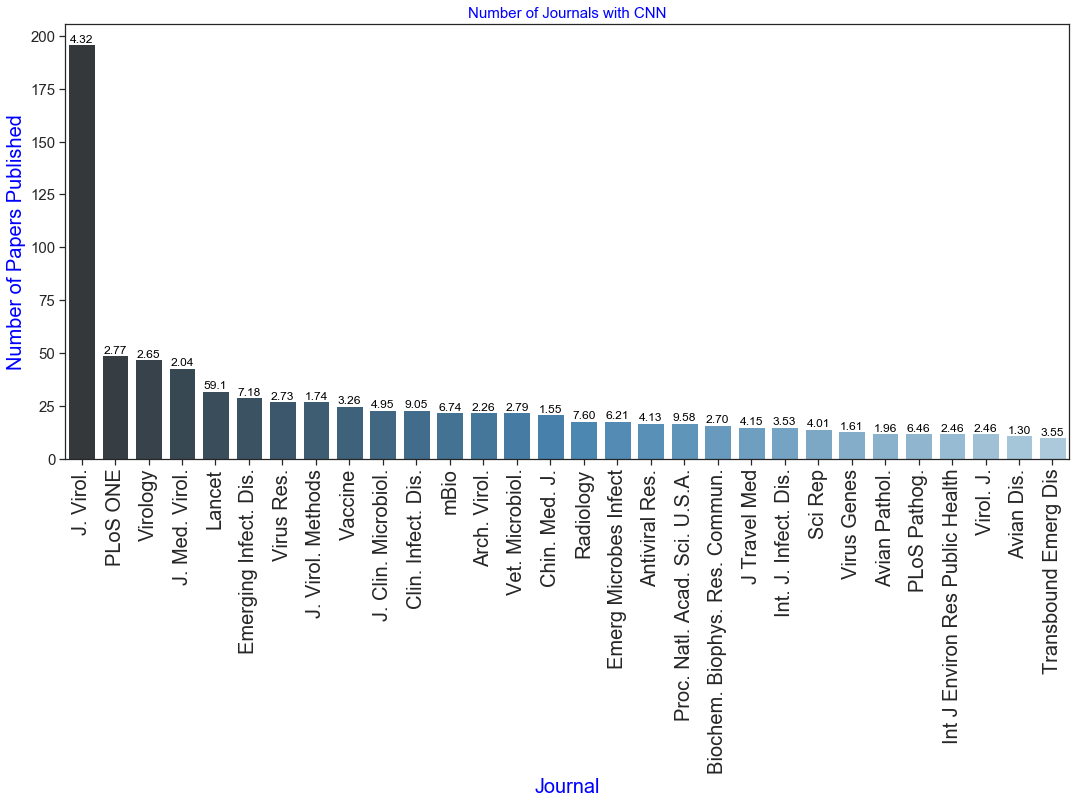

In [23]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")

total_published=  minus_reviews.groupby(['ISOAbbreviation', 'impact_factor_x'])[['PMID']].count()\
    .reset_index().sort_values('PMID', ascending = False).reset_index(drop= True).head(30)
g =sns.barplot(x = 'ISOAbbreviation', y = 'PMID', data = total_published, palette ="Blues_d")
plt.xlabel('Journal',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('Number of Journals with CNN', fontsize = 15, color = 'blue')

for index, row in total_published.iterrows():
    g.text(row.name,row.PMID, str(row.impact_factor_x[0:4]),color='black', ha="center", fontsize = 12, va='bottom');

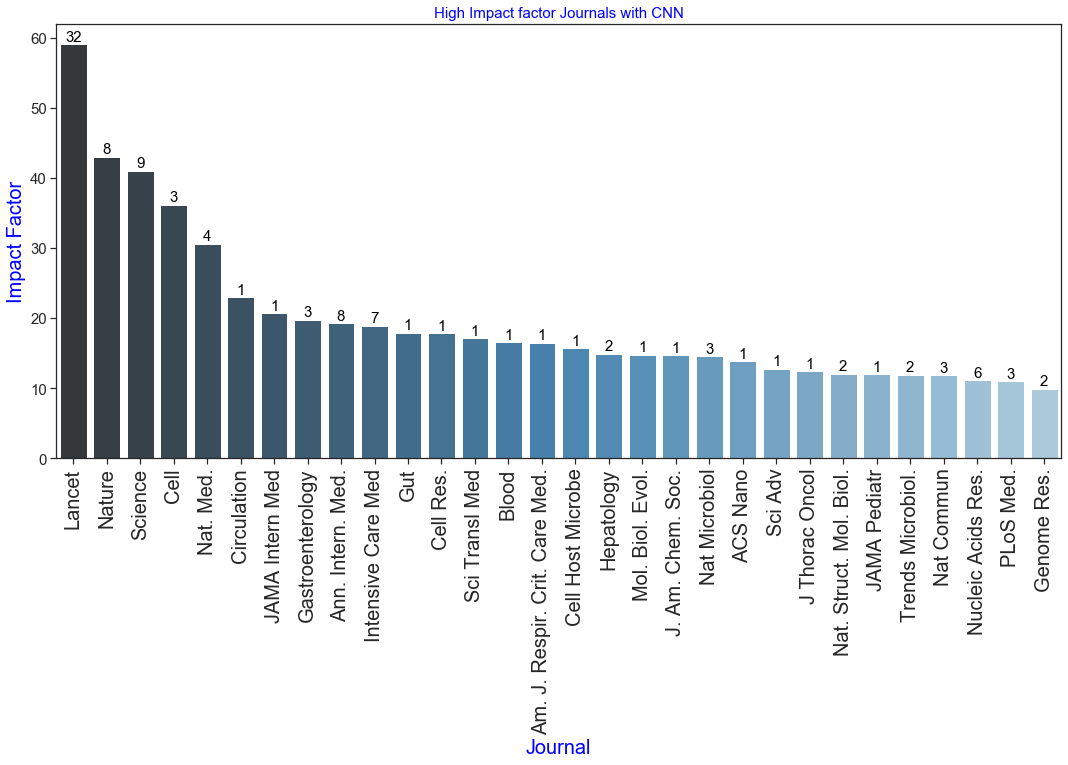

In [27]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")
highimpact_journal= minus_reviews.groupby(['ISOAbbreviation','impact_factor_x'])['PMID'].count()\
            .sort_values(ascending = False).reset_index()              
highimpact_journal['impact_factor_x']=highimpact_journal.impact_factor_x.str.replace('Not Available', "0.0")
highimpact_journal['impact_factor_x']=highimpact_journal.impact_factor_x.astype('float')
highimpact_journal=highimpact_journal.sort_values('impact_factor_x', ascending = False).reset_index()
highimpact_journal=highimpact_journal.drop('index', axis=1).head(30)
g =sns.barplot(x = 'ISOAbbreviation', y = 'impact_factor_x', data = highimpact_journal, palette ="Blues_d")
plt.xlabel('Journal',fontsize = 20, color = 'blue')
plt.ylabel('Impact Factor',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('High Impact factor Journals with CNN', fontsize = 15, color = 'blue')

for index, row in highimpact_journal.iterrows():
    g.text(row.name,row.impact_factor_x, round(row.PMID,1),color='black', ha="center", fontsize = 15, va='bottom');